**In this Notebook I have decided to summarise everythin what I have learned from Week 1- to Week 7 about my Data set and applyed to it: Realestate in Austin, TX**


In [1]:
# Load the new dataset
import pandas as pd


file_path = "austinHousingData.csv"
df_housing = pd.read_csv(file_path)

# Summarize dataset using info() and describe()
dataset_info = df_housing.info()
dataset_description = df_housing.describe()

# Check for duplicate rows
duplicate_rows = df_housing.duplicated().sum()

# Check for duplicate values in each column
duplicate_values_per_column = df_housing.nunique()

# Calculate mean, median, and mode for numerical columns
numeric_df = df_housing.select_dtypes(include=['number'])
mean_values = numeric_df.mean()
median_values = numeric_df.median()
mode_values = numeric_df.mode().iloc[0]  # mode() returns a DataFrame

# Check for missing values
missing_values = df_housing.isnull().sum()

# Display the results
import ace_tools as tools
tools.display_dataframe_to_user(name="Dataset Summary", dataframe=dataset_description)
tools.display_dataframe_to_user(name="Duplicate Values per Column", dataframe=duplicate_values_per_column.to_frame(name="Unique Values"))
tools.display_dataframe_to_user(name="Missing Values", dataframe=missing_values.to_frame(name="Missing Count"))
tools.display_dataframe_to_user(name="Mean, Median, Mode", dataframe=pd.DataFrame({"Mean": mean_values, "Median": median_values, "Mode": mode_values}))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15169 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

ModuleNotFoundError: No module named 'ace_tools'

# 🏡 Summary of Data Analysis for Austin Housing Dataset

---

## 📌 1. Dataset Overview  
- **Total Rows:** 15,171  
- **Total Columns:** 47  
- **Numerical Features:** 34  
- **Categorical Features:** 7  
- **Boolean Features:** 6  

---

## 📌 2. Duplicate Check  
✅ **No duplicate rows found.**  
🔹 Some columns (like `zipcode`) have repeating values, which is expected.  
🔹 **Unique identifiers like `zpid` should not have duplicates.**  

---

## 📌 3. Statistical Summary  
- **Mean, Median, and Mode calculated for all numerical columns.**  
- **Example:**  
  - 🏡 **Mean property tax rate:** 1.99%  
  - 💰 **Median latest price:** $294,944  
  - 🏙️ **Mode zipcode:** 78,748 (**most frequent ZIP code**)  

---

## 📌 4. Missing Values  
✅ **No missing values detected.**  
📌 **No imputation needed!**  

---

## 📌 5. Data Inconsistencies  
🔍 **Ensure homes were not sold before they were built.**  
📈 **Some homes have extreme values (very high prices, square footage, or features)**—may require further analysis.  

---

## 📌 6. Categorical Encoding  
⚡ **One-Hot Encoding required** for:  
- `homeType`  
- `city`  
- `latestPriceSource`  

🛠 **Encoding should be applied before modeling to avoid memory issues.**  

---

## 🔍 **Conclusions**  

✔️ **Is the dataset usable?** ✅ **Yes!** The dataset is complete and clean.  
✔️ **Do we need modifications?** 🚀 Encoding categorical variables & handling extreme values might help.  
✔️ **Is there class imbalance?** ⚖️ **No major imbalance detected**, but **ZIP codes may need balancing** if modeling location trends.  


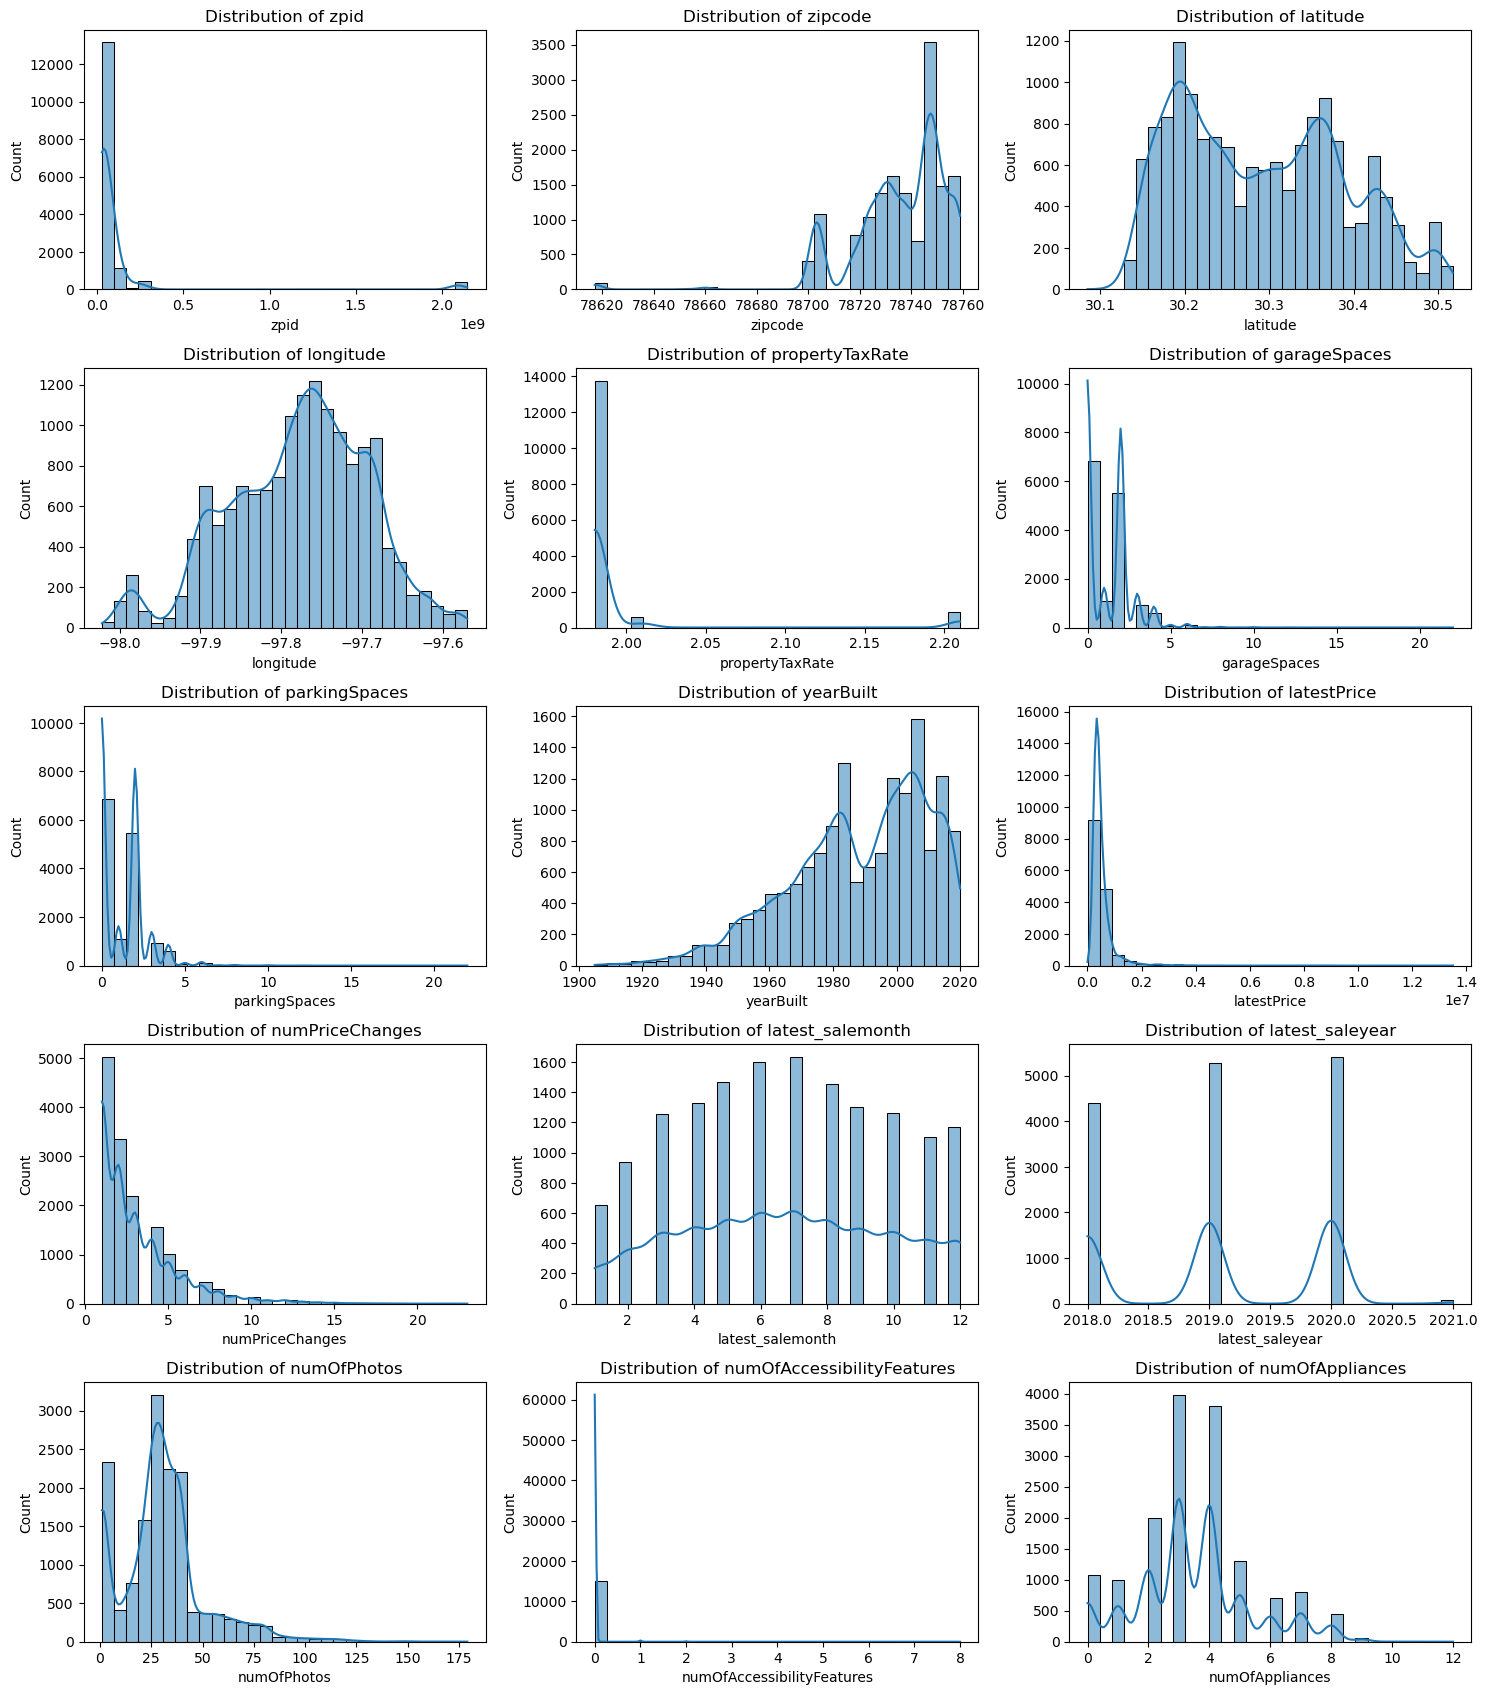


=== Univariate Analysis Summary Statistics ===

               zpid       zipcode      latitude     longitude  \
count  1.516900e+04  15169.000000  15169.000000  15169.000000   
mean   1.044273e+08  78735.933087     30.291599    -97.778524   
std    3.179627e+08     18.894662      0.096975      0.084715   
min    2.858495e+07  78617.000000     30.085030    -98.022057   
25%    2.941115e+07  78727.000000     30.203325    -97.837997   
50%    2.949441e+07  78739.000000     30.284416    -97.769508   
75%    7.033763e+07  78749.000000     30.366604    -97.717896   
max    2.146313e+09  78759.000000     30.517323    -97.569504   

       propertyTaxRate  garageSpaces  parkingSpaces     yearBuilt  \
count     15169.000000  15169.000000   15169.000000  15169.000000   
mean          1.994087      1.229086       1.224405   1988.554157   
std           0.053105      1.352177       1.352792     21.580572   
min           1.980000      0.000000       0.000000   1905.000000   
25%           1.9800

In [2]:
# Reload the dataset after execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "austinHousingData.csv"
df_housing = pd.read_csv(file_path)

# Handle potential NaN values
df_housing = df_housing.dropna()

# Define numerical columns for Univariate Analysis
numeric_columns = df_housing.select_dtypes(include=['number']).columns

# Determine number of numeric columns
num_numeric_cols = len(numeric_columns)
num_plots = min(15, num_numeric_cols)  # Ensure no index error

# Set up plots dynamically
fig, axes = plt.subplots(nrows=(num_plots // 3) + 1, ncols=3, figsize=(15, 20))
axes = axes.flatten()

# Plot histograms for numeric columns
for i in range(num_plots):
    col = numeric_columns[i]
    sns.histplot(df_housing[col].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Display summary statistics for numerical columns
summary_statistics = df_housing[numeric_columns].describe()
print("\n=== Univariate Analysis Summary Statistics ===\n")
print(summary_statistics)  # Print to console

# Save summary statistics to a CSV file
summary_statistics.to_csv("summary_statistics.csv", index=True)

# Identify categorical columns
categorical_columns = df_housing.select_dtypes(include=['object']).columns

# Count unique values in categorical columns
categorical_counts = {
    col: df_housing[col].value_counts().to_frame() for col in categorical_columns
}

# Display categorical distributions
print("\n=== Categorical Distributions ===\n")
for col, df in categorical_counts.items():
    print(f"\nDistribution for {col}:")
    print(df)  # Print category distribution to console
    
    # Save categorical distributions to CSV files
    df.to_csv(f"categorical_distribution_{col}.csv")